In [1]:
import numpy as np 
import pandas as pd 

In [2]:
df=pd.read_csv('housing.csv')

In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.00000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


In [4]:
nan_values = df.isna()

nan_columns = nan_values.any()


columns_with_nan = df.columns[nan_columns].tolist()

print(columns_with_nan)

['total_bedrooms']


In [5]:
df.dropna(subset = ["total_bedrooms"], inplace=True)

In [6]:
df['total_bedrooms'].isna().sum()

0

In [7]:
df.isnull().values.any()

False

In [8]:
import seaborn as sns

In [9]:
import matplotlib.pyplot as plt

<AxesSubplot:>

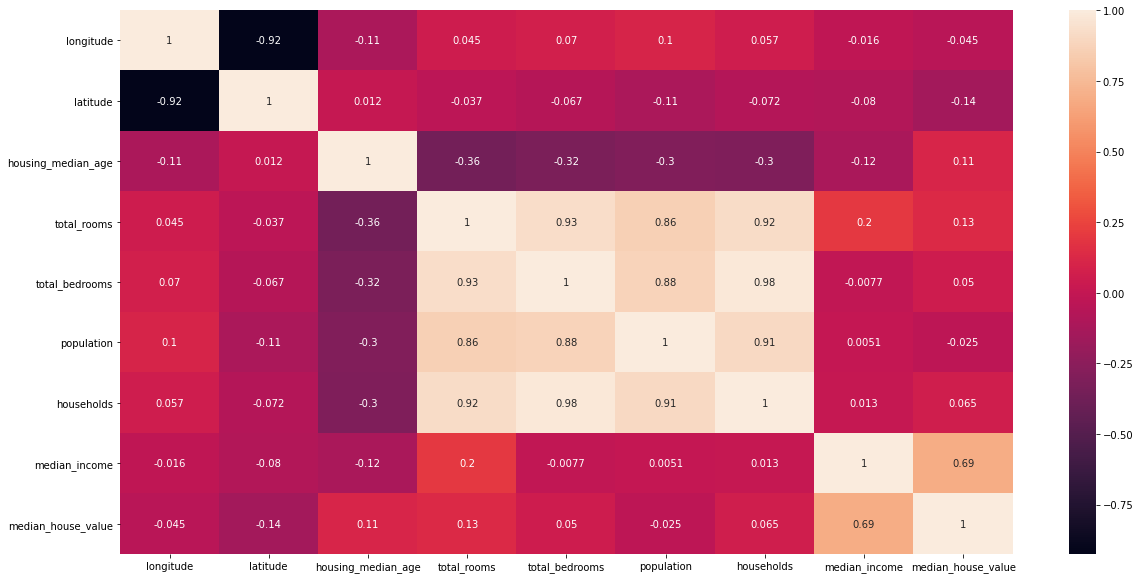

In [10]:
plt.figure(figsize = (20,10))       
sns.heatmap(df.corr(),annot = True)

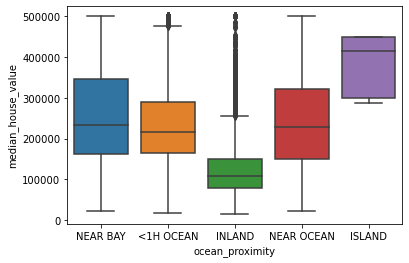

In [11]:
sns.boxplot(x = df["ocean_proximity"], y = df["median_house_value"]);

In [12]:
df['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [13]:
OC_mapping = {"INLAND": 0, "<1H OCEAN": 1 , "NEAR OCEAN":2 ,"NEAR BAY": 3,"ISLAND":4}
df['ocean_proximity'] = df['ocean_proximity'].map(OC_mapping)

In [14]:
df[df.columns[df.isnull().any()]]

""
0
1
2
3
4
...
20635
20636
20637
20638


In [15]:
result = df['median_house_value'].to_numpy()

In [16]:
df.drop('median_house_value',axis=1,inplace=True)

In [17]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,3


In [18]:
df.columns.values

array(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity'], dtype=object)

In [19]:
from sklearn import preprocessing 

In [20]:
columns = ['longitude', 'latitude', 'housing_median_age', 'total_rooms','total_bedrooms', 'population', 'households', 'median_income']
min_max = preprocessing.MinMaxScaler()
df[columns] = min_max.fit_transform(df[columns])
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,0.211155,0.567481,0.784314,0.022331,0.019863,0.008941,0.020556,0.539668,3
1,0.212151,0.565356,0.392157,0.180503,0.171477,0.067210,0.186976,0.538027,3
2,0.210159,0.564293,1.000000,0.037260,0.029330,0.013818,0.028943,0.466028,3
3,0.209163,0.564293,1.000000,0.032352,0.036313,0.015555,0.035849,0.354699,3
4,0.209163,0.564293,1.000000,0.041330,0.043296,0.015752,0.042427,0.230776,3


In [21]:
from sklearn.metrics import r2_score

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df,result, test_size=0.35, random_state=42)

In [23]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train,y_train)
reg.score(X_train,y_train)

0.6321749563908341

In [24]:
class LinearRegression() :
      
    def __init__( self, learning_rate, iterations ) :
        self.learning_rate = learning_rate  
        self.iterations = iterations
              
    def fit( self, X, Y ) :
        self.m, self.n = X.shape
        self.W = np.random.randn( self.n )
        self.b = np.random.randn()  
        self.X = X
        self.Y = Y
        
        for i in range( self.iterations ) :
            self.update_weights()
        
        return self
        
    def update_weights( self ) :
        Y_pred = self.predict( self.X )
        dW = - ( 2 * ( self.X.T ).dot( self.Y - Y_pred )  ) / self.m
        db = - 2 * np.sum( self.Y - Y_pred ) / self.m 
        self.W = self.W - self.learning_rate * dW
        self.b = self.b - self.learning_rate * db
          
        return self 
      
    def predict( self, X ) :
        return X.dot( self.W ) + self.b

In [25]:
    model = LinearRegression( iterations = 10000, learning_rate = 0.3 )
  
    model.fit( X_train, y_train )
      
    # Prediction on test set
  
    Y_pred = model.predict( X_test )

In [26]:
print( "Predicted values ", np.round( Y_pred[:3], 2 ) ) 
print( "Real values      ", y_test[:3] )
print( "Trained W        ", round( model.W[0], 2 ) )
print( "Trained b        ", round( model.b, 2 ) )

Predicted values  14416    203451.48
16383    160043.08
7731     202128.05
dtype: float64
Real values       [245800. 137900. 218200.]
Trained W         -343989.04
Trained b         297268.06


In [27]:
from sklearn.metrics import mean_squared_error

In [28]:
r2_score(Y_pred,y_test)

0.42607897780558635

In [29]:
X_test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
14416,0.708167,0.026567,0.372549,0.024391,0.042986,0.014630,0.041605,0.185094,2
16383,0.304781,0.581296,0.019608,0.162801,0.173029,0.093164,0.157211,0.274976,0
7731,0.618526,0.146652,0.588235,0.094842,0.132216,0.064744,0.131557,0.187846,1
1410,0.227092,0.573858,0.568627,0.031996,0.042675,0.019731,0.036178,0.164970,3
1335,0.245020,0.579171,0.058824,0.055166,0.092489,0.025926,0.075645,0.248390,0
...,...,...,...,...,...,...,...,...,...
17343,0.392430,0.246546,0.274510,0.024823,0.028864,0.011323,0.029765,0.267245,1
9474,0.102590,0.731137,0.411765,0.052978,0.066884,0.031671,0.065943,0.130391,1
13295,0.668327,0.162593,0.823529,0.050053,0.058659,0.028953,0.064134,0.186784,0
20480,0.562749,0.184910,0.470588,0.060405,0.076040,0.033549,0.072028,0.290230,1


In [30]:
mean_squared_error(y_test, Y_pred)

4671263994.414591

In [31]:
mean_squared_error(y_test, Y_pred, squared=False)

68346.64581685477

In [32]:
class LinearRegression:
    
    def cost_function(self, X, y, weights,b):                 
        z = np.dot(X, weights)+b
        cost = (y-z)**2
        return sum(cost)
    
    def fit(self, X, y, epochs=25, lr=0.005):        
        loss = []
        weights = np.zeros((X.shape[1],1))
        b = 0
        i=0
        y = y.reshape(-1,1)
        N = 1/len(X)
                 
        for _ in range(epochs):        
            y_hat = np.dot(X, weights)+b
            weights -= lr *2* np.dot(X.T,(y - y_hat))*N   
            b -= lr*2*np.sum(y - y_hat)*N
            loss.append(self.cost_function(X, y, weights,b)) 
            
        self.weights = weights
        self.loss = loss
        self.b = b
        return weights,b
    
    def predict(self,X,weights,b):        
        z = np.dot(X,weights)+b
        return  z

In [33]:
from sklearn.metrics import accuracy_score

In [34]:
clf = LinearRegression()
w,b=clf.fit(X_train,y_train,1000,1e-5)
pred = clf.predict(X_test,w,b)

In [35]:
from sklearn.metrics import r2_score
r2_score(pred,y_test)

-2316.986055283792

In [36]:
pred = clf.predict(X_train,w,b)

In [37]:
r2_score(pred,y_train)

-2308.61194072142